In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from pandas import to_datetime



In [ ]:
pip install neuralprophet

     |████████████████████████████████| 56 kB 3.1 MB/s 
     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu102 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.


In [ ]:
df = pd.read_csv('sphist.csv')


In [ ]:
df2 = pd.DataFrame()

df2['ds'] = to_datetime(df['Date'])

df2['y'] = df['Close']

In [ ]:
df2.sort_values(by=['ds'], inplace=True)

In [ ]:
df2.head()

,ds,y
17199,1953-03-20,26.18
17198,1953-03-23,26.02
17197,1953-03-24,26.17
17196,1953-03-25,26.10
17195,1953-03-26,25.95


In [ ]:
model4 = NeuralProphet(
    n_forecasts=60,
    n_lags=100,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)
model4.fit(df2, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO: nprophet - _handle_missing_data: 7756 missing dates were added.
INFO: nprophet - _handle_missing_data: 7756 NaN values in column y were auto-imputed.
Epoch[100/100]: 100%|██████████| 100/100 [05:11<00:00,  3.12s/it, SmoothL1Loss=0.000213, MAE=22.7, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.046411,297.045803,0.0
1,0.001084,60.108853,0.0
2,0.003653,110.907461,0.0
3,0.019748,256.250173,0.0
4,0.020847,261.521051,0.0
...,...,...,...
95,0.000449,41.125972,0.0
96,0.000350,35.143355,0.0
97,0.000250,27.728141,0.0
98,0.000220,23.781511,0.0


In [ ]:
future = model4.make_future_dataframe(df2, periods=60)

INFO: nprophet - _handle_missing_data: 43 missing dates were added.
INFO: nprophet - _handle_missing_data: 43 NaN values in column y were auto-imputed.


In [ ]:
forecast = model4.predict(future)

In [ ]:
print(forecast)

            ds            y yhat1  ...     ar60    trend season_yearly
0   2021-02-24  3925.430000  None  ...     None     None          None
1   2021-02-25  3829.340000  None  ...     None     None          None
2   2021-02-26  3811.150000  None  ...     None     None          None
3   2021-02-27  3841.373333  None  ...     None     None          None
4   2021-02-28  3871.596667  None  ...     None     None          None
..         ...          ...   ...  ...      ...      ...           ...
198 2021-09-10          NaN  None  ...   4512.4 -108.405      -6.33636
199 2021-09-11          NaN  None  ...  4514.56 -108.384      -6.48669
200 2021-09-12          NaN  None  ...  4516.98 -108.364      -6.63663
201 2021-09-13          NaN  None  ...  4517.06 -108.344      -6.78578
202 2021-09-14          NaN  None  ...  4512.95 -108.323      -6.93371

[203 rows x 184 columns]


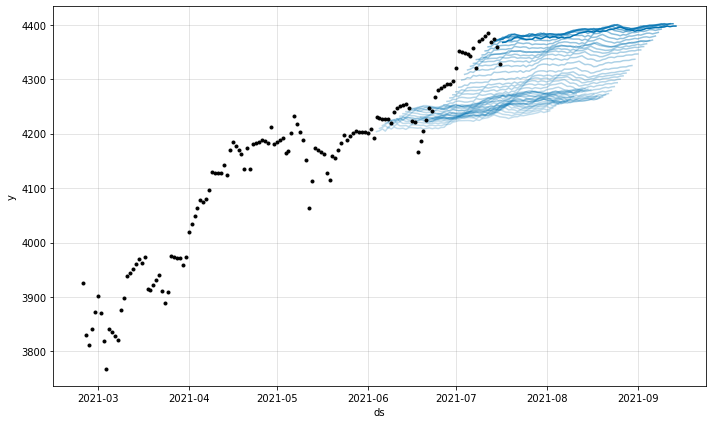

In [ ]:
fig1 = model4.plot(forecast)

In [ ]:
def plot_forecast(model, data, periods, historic_pred=True, highlight_steps_ahead=None):
  
   
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast)
    else:    
        model.plot(forecast)

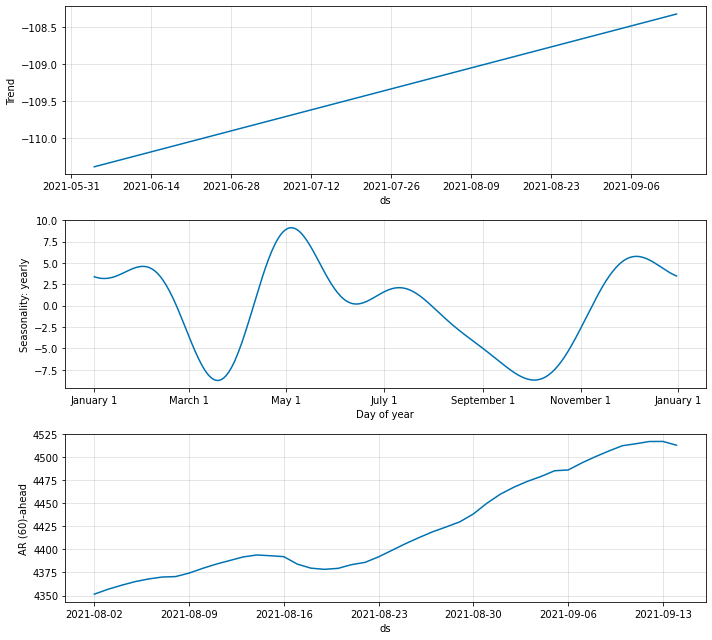

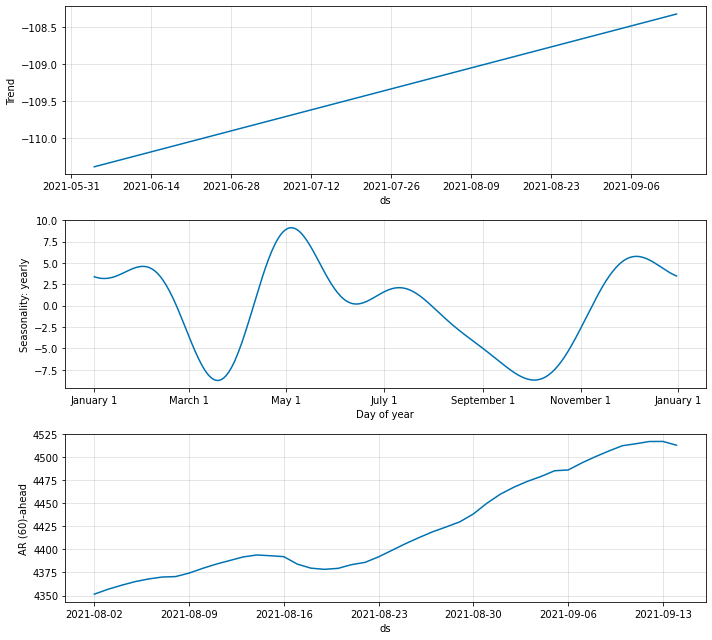

In [ ]:
model4.plot_components(forecast)


INFO: nprophet - _handle_missing_data: 7756 missing dates were added.
INFO: nprophet - _handle_missing_data: 7756 NaN values in column y were auto-imputed.


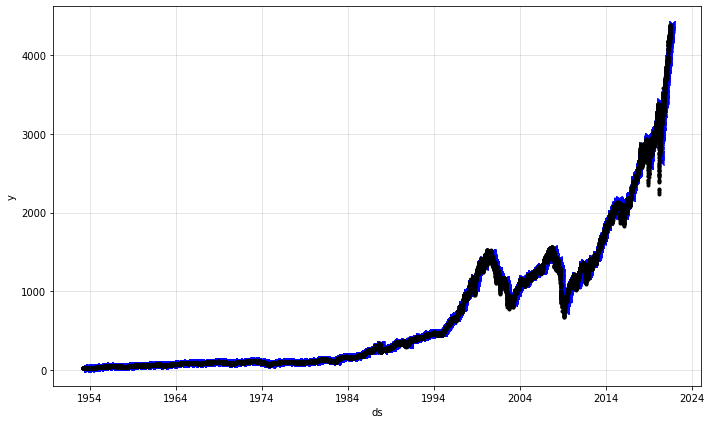

In [ ]:
plot_forecast(model4, df2, periods=60, historic_pred=True)

INFO: nprophet - _handle_missing_data: 43 missing dates were added.
INFO: nprophet - _handle_missing_data: 43 NaN values in column y were auto-imputed.


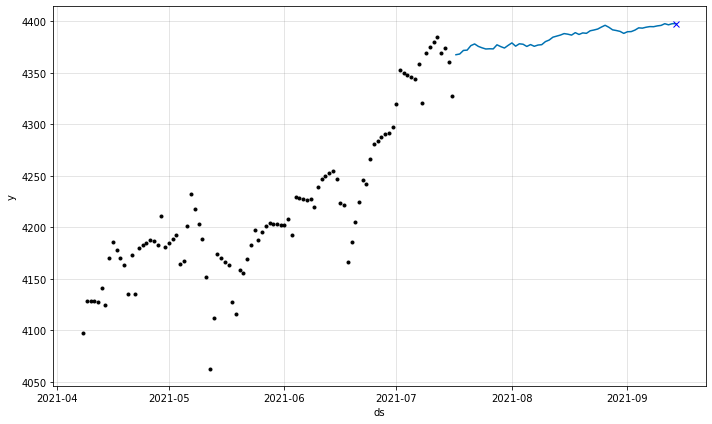

In [ ]:
plot_forecast(model4, df2, periods=60, historic_pred=False, highlight_steps_ahead=60)

In [ ]:
model3 = NeuralProphet(
    n_forecasts=365*5,
    n_lags=365*10,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)
model3.fit(df2, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO: nprophet - _handle_missing_data: 7756 missing dates were added.
INFO: nprophet - _handle_missing_data: 7756 NaN values in column y were auto-imputed.
Epoch[100/100]: 100%|██████████| 100/100 [2:50:56<00:00, 102.56s/it, SmoothL1Loss=0.000529, MAE=47.8, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,2.952113,8116.206245,0.0
1,1.851001,5454.757293,0.0
2,2.915062,8070.991420,0.0
3,4.710862,12426.761956,0.0
4,6.747476,17341.936033,0.0
...,...,...,...
95,0.001297,77.005252,0.0
96,0.000948,65.409954,0.0
97,0.000679,55.256934,0.0
98,0.000577,50.402878,0.0


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
17560,2022-07-12,3460.855432,3280.649468,3655.010498
17561,2022-07-13,3461.070070,3265.417030,3653.991171
17562,2022-07-14,3461.407135,3277.135722,3648.207195
17563,2022-07-15,3461.093844,3271.709787,3658.331452
17564,2022-07-16,3460.917590,3272.925493,3650.551694


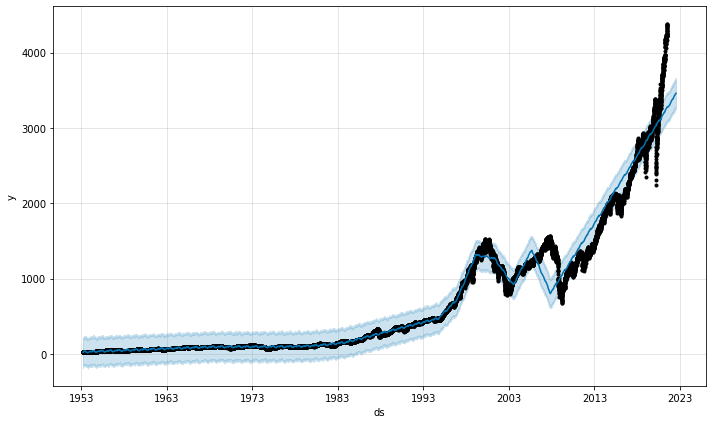

In [ ]:
fig1 = m.plot(forecast)


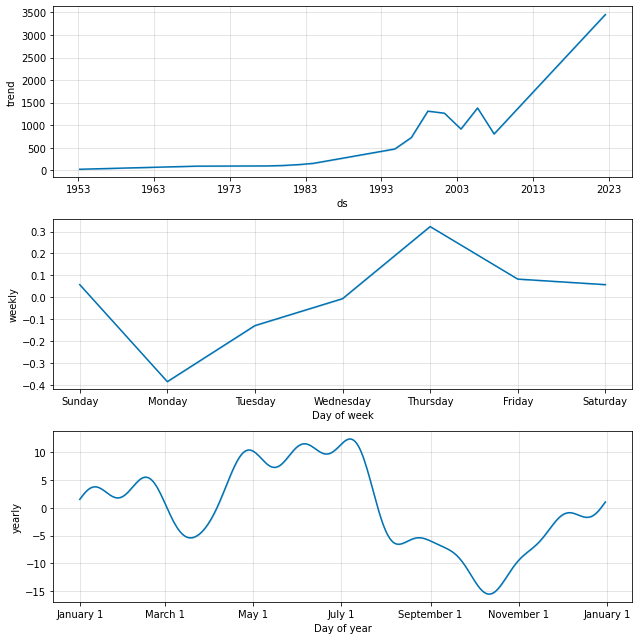

In [ ]:
m.plot_components(forecast);


In [ ]:
forecast.tail(365)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
17200,2021-07-17,3271.688748,3097.779536,3479.856935,3271.688748,3271.688748,8.687242,8.687242,8.687242,0.057644,0.057644,0.057644,8.629597,8.629597,8.629597,0.0,0.0,0.0,3280.375990
17201,2021-07-18,3272.182253,3092.684529,3466.762242,3272.182253,3272.182253,7.891041,7.891041,7.891041,0.057651,0.057651,0.057651,7.833390,7.833390,7.833390,0.0,0.0,0.0,3280.073293
17202,2021-07-19,3272.675757,3097.605667,3461.094043,3272.675757,3272.675757,6.597783,6.597783,6.597783,-0.385084,-0.385084,-0.385084,6.982867,6.982867,6.982867,0.0,0.0,0.0,3279.273540
17203,2021-07-20,3273.169262,3101.703488,3458.257067,3273.169262,3273.169262,5.958371,5.958371,5.958371,-0.129297,-0.129297,-0.129297,6.087669,6.087669,6.087669,0.0,0.0,0.0,3279.127633
17204,2021-07-21,3273.662767,3099.505452,3463.937141,3273.662767,3273.662767,5.151804,5.151804,5.151804,-0.006472,-0.006472,-0.006472,5.158275,5.158275,5.158275,0.0,0.0,0.0,3278.814570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,2022-07-12,3449.350422,3263.662238,3655.618933,3434.106768,3463.219897,11.505011,11.505011,11.505011,-0.129297,-0.129297,-0.129297,11.634308,11.634308,11.634308,0.0,0.0,0.0,3460.855432
17561,2022-07-13,3449.843926,3269.080156,3647.863869,3434.132051,3463.957044,11.226143,11.226143,11.226143,-0.006472,-0.006472,-0.006472,11.232615,11.232615,11.232615,0.0,0.0,0.0,3461.070070
17562,2022-07-14,3450.337431,3264.374852,3653.358733,3434.528993,3464.688131,11.069704,11.069704,11.069704,0.322655,0.322655,0.322655,10.747050,10.747050,10.747050,0.0,0.0,0.0,3461.407135
17563,2022-07-15,3450.830936,3268.205816,3643.274362,3434.925935,3465.376858,10.262909,10.262909,10.262909,0.082904,0.082904,0.082904,10.180005,10.180005,10.180005,0.0,0.0,0.0,3461.093844


In [ ]:
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 1953-03-20  3.054918    2.938884    3.178329
1 1953-03-23  3.057076    2.944493    3.184716
2 1953-03-24  3.058301    2.941714    3.176475
3 1953-03-25  3.059817    2.937756    3.182060
4 1953-03-26  3.061033    2.940165    3.187214


In [ ]:
from neuralprophet import NeuralProphet

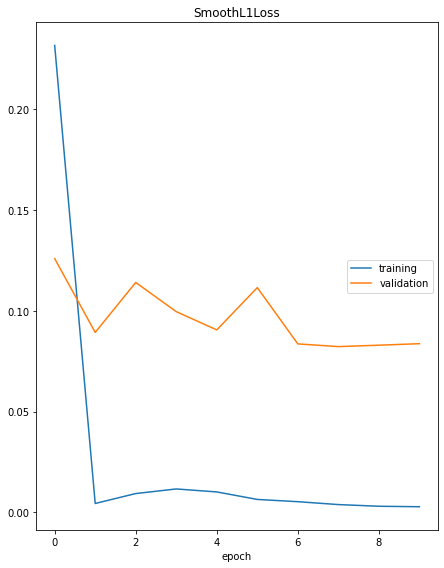

Epoch[10/10]: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s, SmoothL1Loss=0.00282, MAE=56.6, RegLoss=0, MAE_val=456, SmoothL1Loss_val=0.0838]


In [ ]:
model = NeuralProphet()
metrics = model.fit(df2, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, epochs=10)

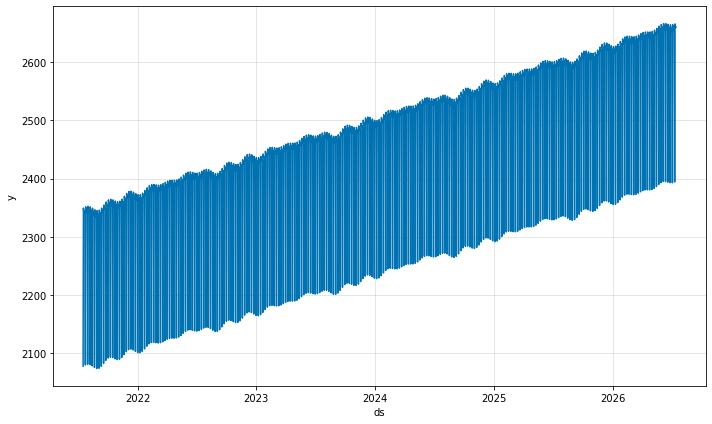

In [ ]:
future = model.make_future_dataframe(df2, periods=365*5)
forecast = model.predict(future)
forecasts_plot = model.plot(forecast)

Text(0.5, 1.0, 'S&P 500 Prices')

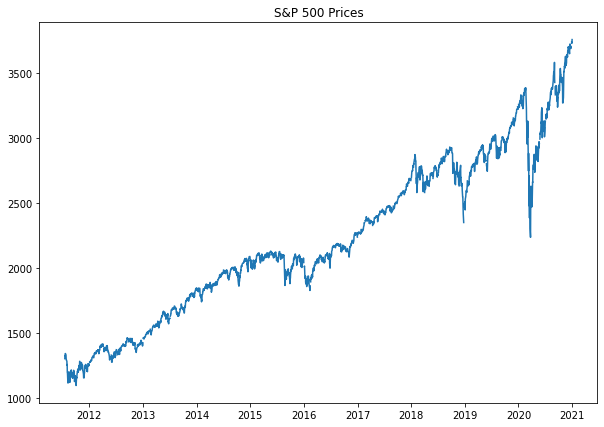

In [ ]:
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
start = datetime(2010, 12, 31)
end = datetime(2020, 12, 31)
sp500_data = pdr.get_data_fred('sp500', start, end)
plt.figure(figsize=(10, 7))
plt.plot(sp500_data)
plt.title('S&P 500 Prices')

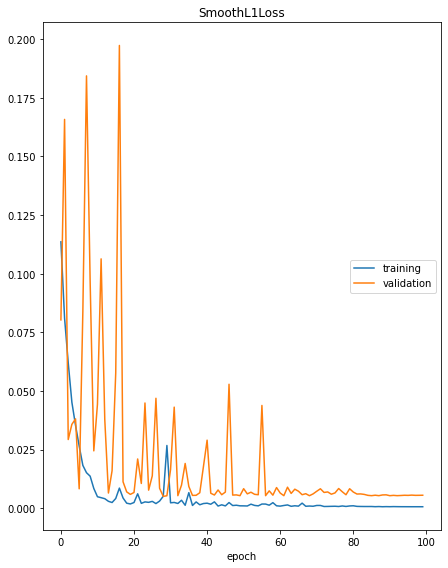

Epoch[100/100]: 100%|██████████| 100/100 [00:14<00:00,  6.90it/s, SmoothL1Loss=0.000614, MAE=46.6, RegLoss=0.000597, MAE_val=148, SmoothL1Loss_val=0.00552]


In [ ]:
sp500_data = sp500_data.reset_index().rename(columns={'DATE': 'ds', 'sp500': 'y'}) # the usual preprocessing routine
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.05,
                      yearly_seasonality=False,
                      weekly_seasonality=False,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

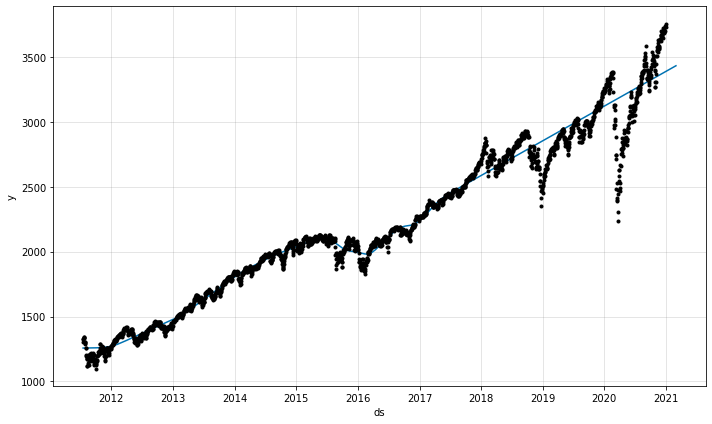

In [ ]:
plot_forecast(model, sp500_data, periods=60)

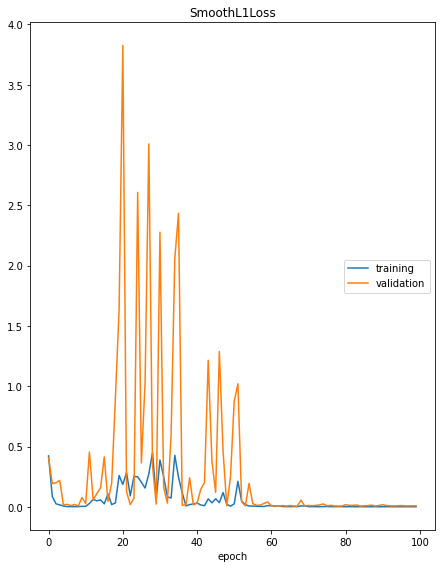

Epoch[100/100]: 100%|██████████| 100/100 [00:16<00:00,  5.92it/s, SmoothL1Loss=0.000729, MAE=50.4, RegLoss=0.00193, MAE_val=192, SmoothL1Loss_val=0.00845]


In [ ]:
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.5,
                      yearly_seasonality=True,
                      weekly_seasonality=False,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

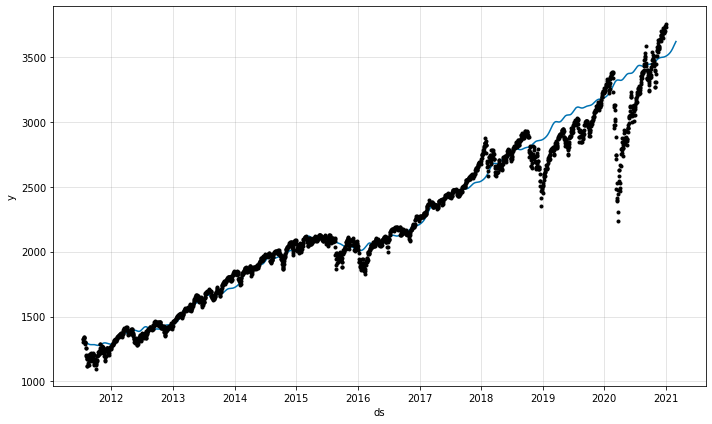

In [ ]:
plot_forecast(model, sp500_data, periods=60)

In [ ]:
model = NeuralProphet(
    n_forecasts=60,
    n_lags=60,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)
model.fit(sp500_data, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO: nprophet - _handle_missing_data: 986 missing dates were added.
INFO: nprophet - _handle_missing_data: 1073 NaN values in column y were auto-imputed.
Epoch[100/100]: 100%|██████████| 100/100 [00:54<00:00,  1.83it/s, SmoothL1Loss=0.000638, MAE=51.6, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.130371,891.073520,0.0
1,0.007967,227.647680,0.0
2,0.002044,109.663717,0.0
3,0.001409,88.637919,0.0
4,0.001423,90.746677,0.0
...,...,...,...
95,0.000658,53.259732,0.0
96,0.000655,52.605517,0.0
97,0.000646,52.481413,0.0
98,0.000640,51.519345,0.0


INFO: nprophet - _handle_missing_data: 986 missing dates were added.
INFO:nprophet:986 missing dates were added.
INFO: nprophet - _handle_missing_data: 1073 NaN values in column y were auto-imputed.
INFO:nprophet:1073 NaN values in column y were auto-imputed.


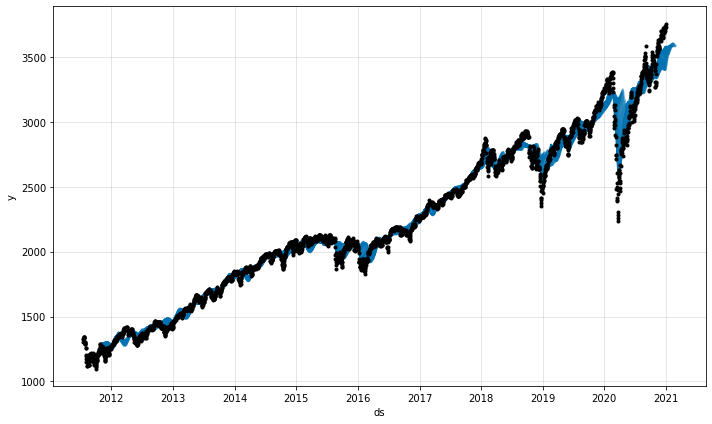

In [ ]:
plot_forecast(model, sp500_data, periods=60, historic_pred=True)

INFO: nprophet - _handle_missing_data: 24 missing dates were added.
INFO:nprophet:24 missing dates were added.
INFO: nprophet - _handle_missing_data: 26 NaN values in column y were auto-imputed.
INFO:nprophet:26 NaN values in column y were auto-imputed.


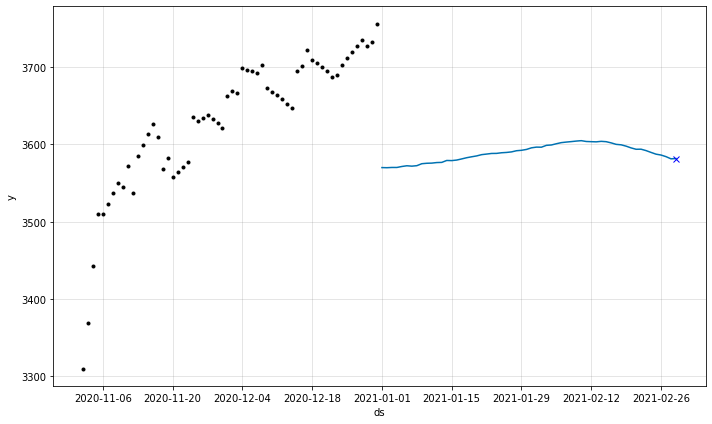

In [ ]:
plot_forecast(model, sp500_data, periods=60, historic_pred=False, highlight_steps_ahead=60)